<a href="https://colab.research.google.com/github/Aayushktyagi/Pytorch_resources/blob/master/Image_classifier_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms

In [17]:
# Transormations for pre-processing images 
'''
Normalize takes mean and standard deviation as parameters
image = image - mean / std
It normalize image from [0,1] to [-1,1]

In RGB case in many places following is used
transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225]) 
'''
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

#load dataset 
trainset  = torchvision.datasets.CIFAR10(root = './data' , train  = True , 
                                         download = True , transform = transform)
trainloader = torch.utils.data.DataLoader(trainset , batch_size = 4,
                                          shuffle = True , num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data' , train = False,
                                       download = True , transform = transform)
testloader = torch.utils.data.DataLoader(testset , batch_size = 4,
                                         shuffle = False , num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


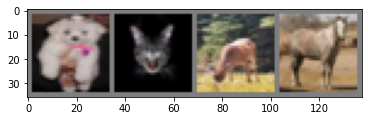

  dog   cat  deer horse


In [ ]:
#visualize images 
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
  # unnormalize image 
  # image = image * std + mean 

  img = img / 2 + 0.5
  npimg = img.numpy() # convert tensor 
  plt.imshow(np.transpose(npimg,(1,2,0))) # transoforming image channels into RGB
  plt.show()

# get images
dataiter = iter(trainlaoder)
images , labels =  dataiter.next()

#show images
imshow(torchvision.utils.make_grid(images))
# labels 
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
# Define a convolution neural network 

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5) #num_input_channel = 3 , num_output = 6 , kernel = 5
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5 , 120)
    self.fc2 = nn.Linear(120,64)
    self.fc3 = nn.Linear(64,10)

  def forward(self , x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1 , 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x


net = Net()

In [12]:
import torch.optim as optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optimizer.SGD(net.parameters(),lr = 0.001 , momentum = 0.9)


In [22]:
# Training 
epochs  = 10

for epoch in range(epochs):
  run_loss = 0.0
  for i, data in enumerate(trainloader,0):
    inputs , labels = data
    # zero grad parameters
    optimizer.zero_grad()
    # forward  
    out = net(inputs)
    loss = criterion(out , labels)
    loss.backward()
    # update parameters
    optimizer.step()

    #print loss
    run_loss += loss.item()
    if i% 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, run_loss / 2000))
      run_loss = 0.0


print('Finished Training')






[1,  2000] loss: 1.664
[1,  4000] loss: 1.572
[1,  6000] loss: 1.504
[1,  8000] loss: 1.479
[1, 10000] loss: 1.438
[1, 12000] loss: 1.394
[2,  2000] loss: 1.331
[2,  4000] loss: 1.298
[2,  6000] loss: 1.323
[2,  8000] loss: 1.276
[2, 10000] loss: 1.268
[2, 12000] loss: 1.238
[3,  2000] loss: 1.178
[3,  4000] loss: 1.177
[3,  6000] loss: 1.181
[3,  8000] loss: 1.157
[3, 10000] loss: 1.141
[3, 12000] loss: 1.116
[4,  2000] loss: 1.062
[4,  4000] loss: 1.059
[4,  6000] loss: 1.077
[4,  8000] loss: 1.072
[4, 10000] loss: 1.081
[4, 12000] loss: 1.045
[5,  2000] loss: 0.984
[5,  4000] loss: 0.998
[5,  6000] loss: 1.001
[5,  8000] loss: 1.022
[5, 10000] loss: 0.987
[5, 12000] loss: 1.000
[6,  2000] loss: 0.922
[6,  4000] loss: 0.944
[6,  6000] loss: 0.929
[6,  8000] loss: 0.967
[6, 10000] loss: 0.960
[6, 12000] loss: 0.947
[7,  2000] loss: 0.840
[7,  4000] loss: 0.895
[7,  6000] loss: 0.913
[7,  8000] loss: 0.919
[7, 10000] loss: 0.934
[7, 12000] loss: 0.914
[8,  2000] loss: 0.819
[8,  4000] 

In [23]:
# save model 
PATH = './cidar_net.pth'
torch.save(net.state_dict(),PATH)

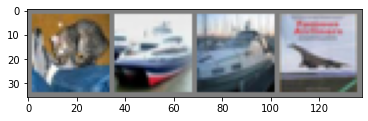

GroundTruth:    cat  ship  ship plane


In [24]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [26]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [27]:
# compute accuracy

total  = 0
correct = 0

with torch.no_grad():
  for data in testloader:
    images , labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data , 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 64 %


In [28]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 78 %
Accuracy of  bird : 43 %
Accuracy of   cat : 50 %
Accuracy of  deer : 70 %
Accuracy of   dog : 48 %
Accuracy of  frog : 71 %
Accuracy of horse : 68 %
Accuracy of  ship : 77 %
Accuracy of truck : 67 %
